In [1]:
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
import keras
import tensorflow
from keras import layers
import numpy as np

In [2]:
"""
input shape  = (14,10,126)
output shape = (14,1)
"""

'\ninput shape  = (14,10,126)\noutput shape = (14,1)\n'

In [3]:
# 10 bands, 14 loudness levels, 126 signal length, 1000 cycles

In [27]:
no_loudness_levels = 12

In [28]:
inputs = Input(shape = (no_loudness_levels,10,126))
x = Conv2D(32, (3, 3), padding="same")(inputs)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Dropout(0.25)(x)
x = Conv2D(32, (3, 3), padding="same")(x)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(2, 2),padding = 'same')(x)
x = Dropout(0.25)(x)
x = Conv2D(32, (3, 3), padding="same")(x)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128)(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
y1 = Dense(150)(x)
y1 = Dense(1)(y1)
y1 = Activation("linear", name="final-output")(y1)
y2 = Dense(150)(x)
y2 = Dense(1)(y2)
y2 = Activation("linear", name="final-output2")(y2)
y3 = Dense(150)(x)
y3 = Dense(1)(y3)
y3 = Activation("linear", name="final-output3")(y3)
y4 = Dense(150)(x)
y4 = Dense(1)(y4)
y4 = Activation("linear", name="final-output4")(y4)
y5 = Dense(150)(x)
y5 = Dense(1)(y5)
y5 = Activation("linear", name="final-output5")(y5)
y6 = Dense(150)(x)
y6 = Dense(1)(y6)
y6 = Activation("linear", name="final-output6")(y6)
y7 = Dense(150)(x)
y7 = Dense(1)(y7)
y7 = Activation("linear", name="final-output7")(y7)
y8 = Dense(150)(x)
y8 = Dense(1)(y8)
y8 = Activation("linear", name="final-output8")(y8)
y9 = Dense(150)(x)
y9 = Dense(1)(y9)
y9 = Activation("linear", name="final-output9")(y9)
y10 = Dense(150)(x)
y10 = Dense(1)(y10)
y10 = Activation("linear", name="final-output10")(y10)
y11 = Dense(150)(x)
y11 = Dense(1)(y11)
y11 = Activation("linear", name="final-output11")(y11)
y12 = Dense(150)(x)
y12 = Dense(1)(y12)
y12 = Activation("linear", name="final-output12")(y12)

In [29]:
model = keras.Model(inputs = inputs, outputs = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12],name = "CNN_n3")

In [30]:
model.summary()

Model: "CNN_n3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 12, 10, 126  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_18 (Conv2D)             (None, 12, 10, 32)   36320       ['input_7[0][0]']                
                                                                                                  
 activation_24 (Activation)     (None, 12, 10, 32)   0           ['conv2d_18[0][0]']              
                                                                                                  
 batch_normalization_24 (BatchN  (None, 12, 10, 32)  128         ['activation_24[0][0]']     

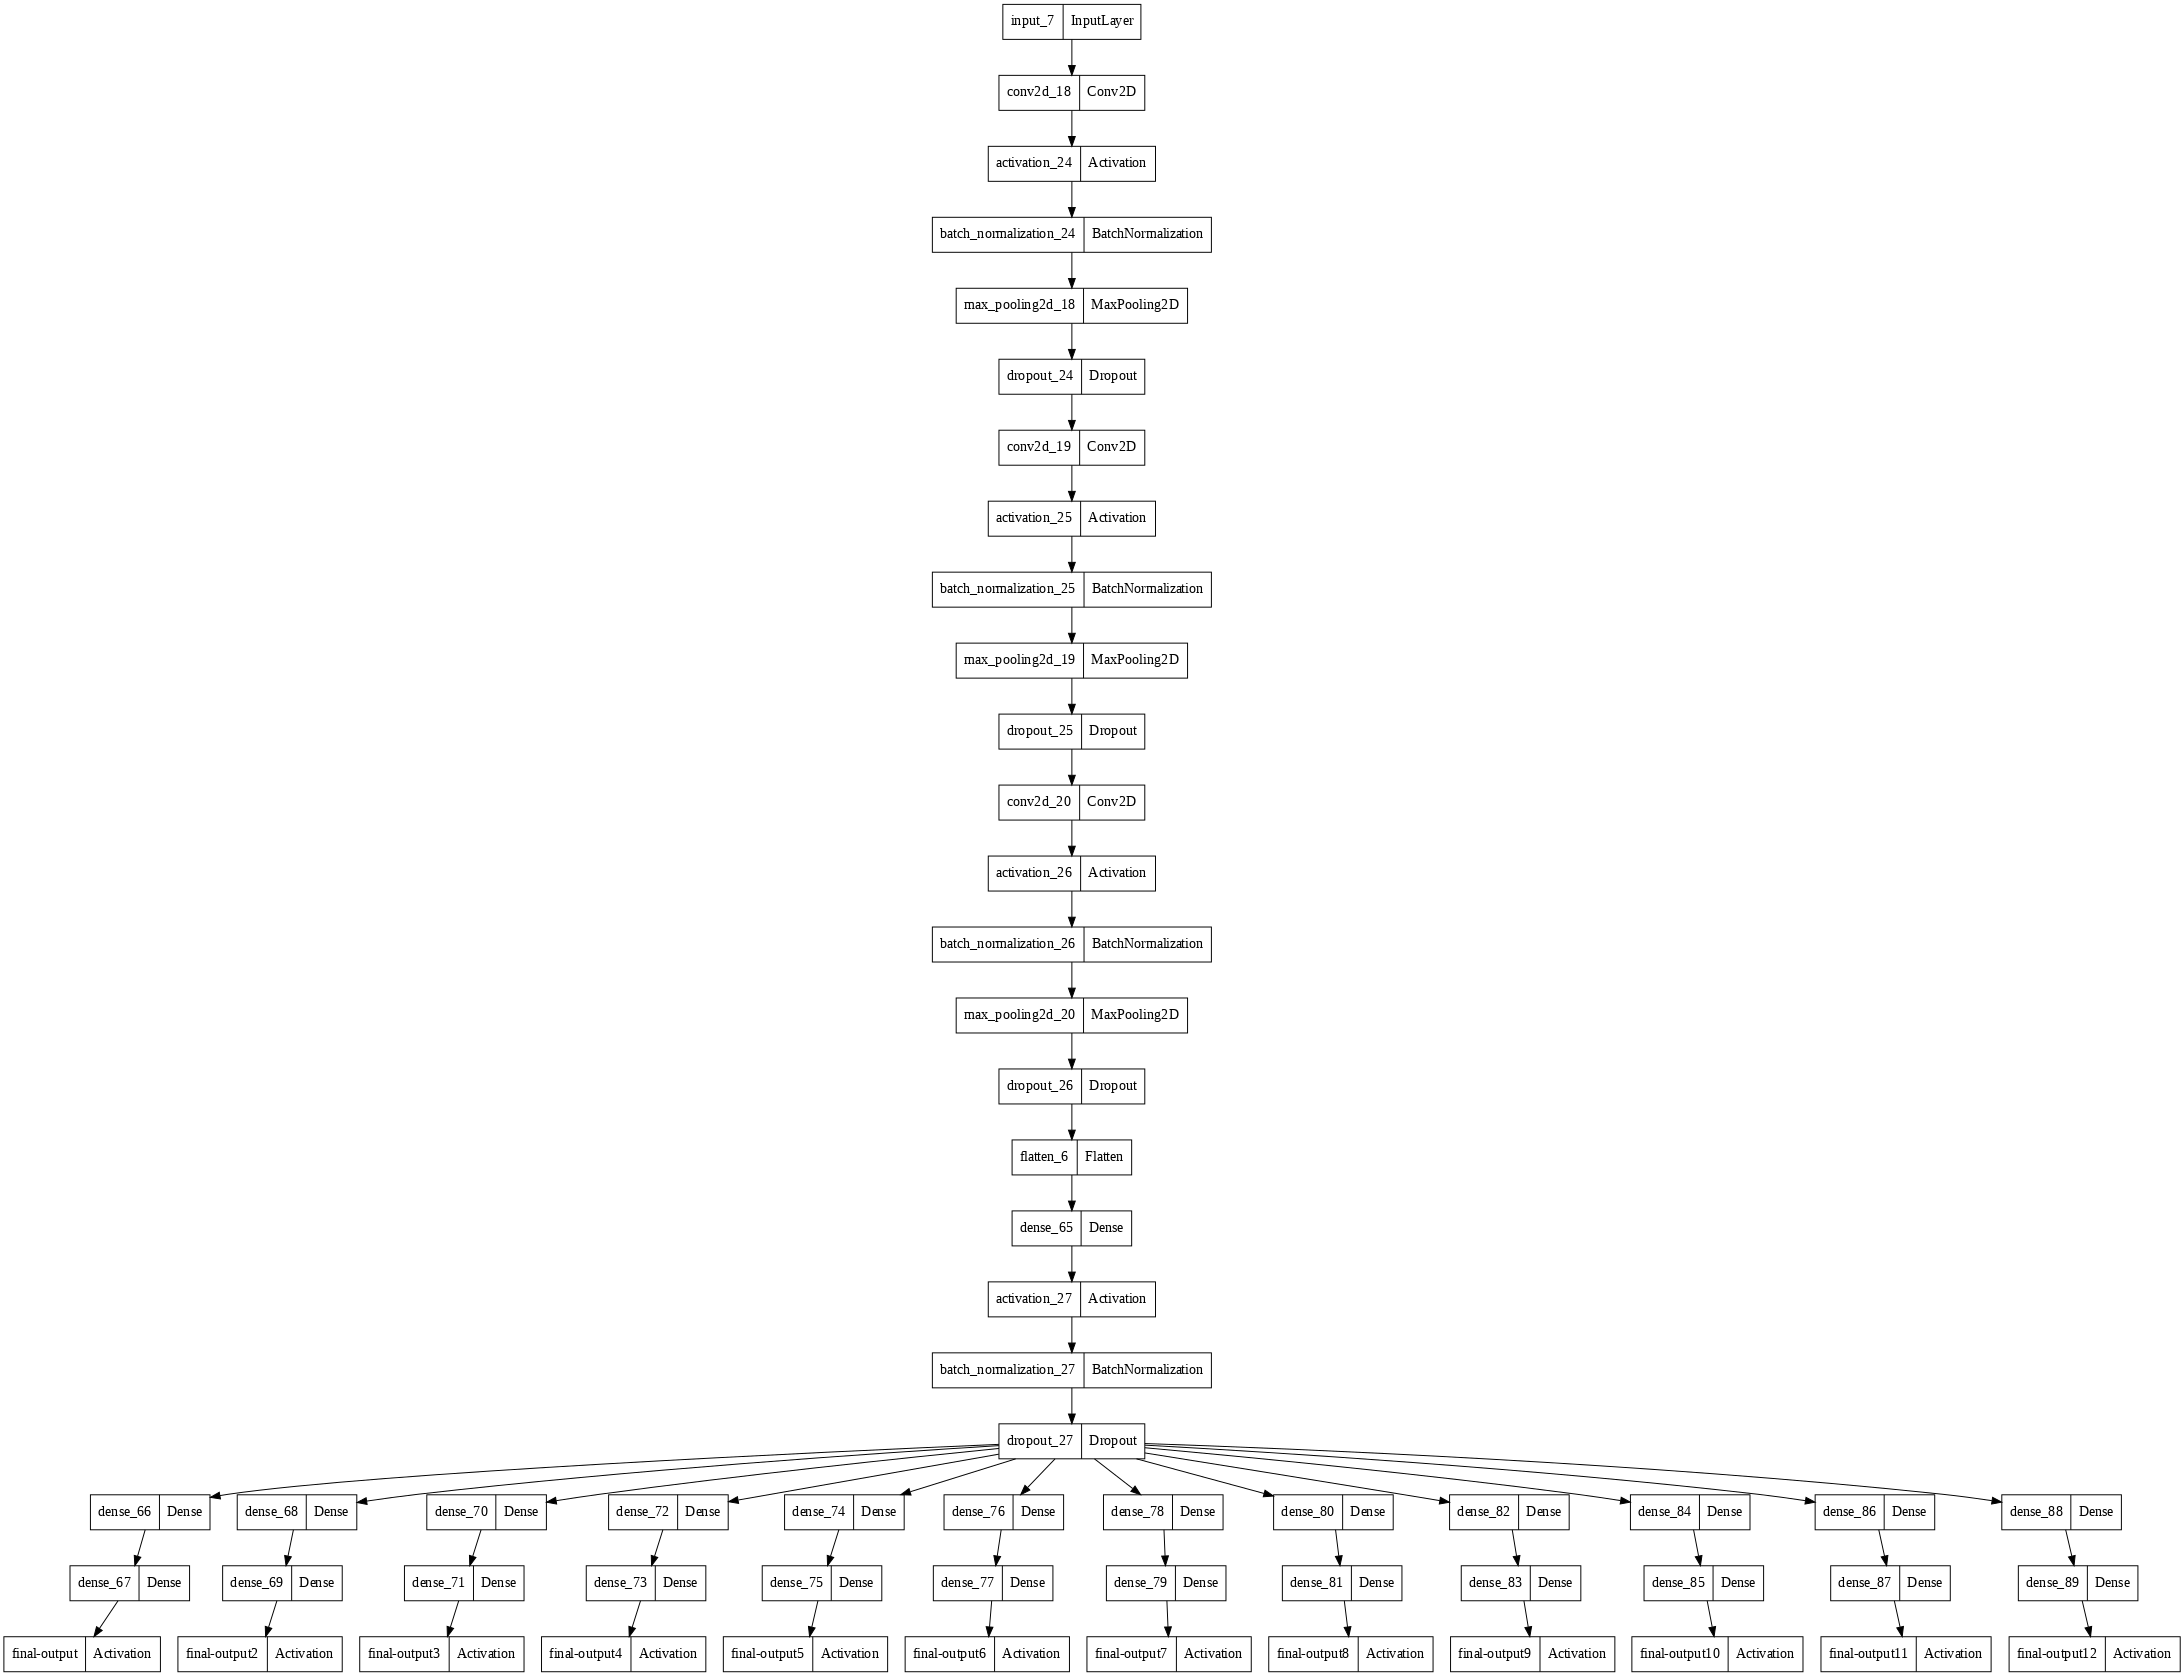

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=70,
    layer_range=None,
    show_layer_activations=False,
)

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
cd drive/MyDrive

/content/drive/MyDrive


In [34]:
x = np.load('ewt_x_n4_cnn_1.npy')
y = np.load('ewt_y_n4_cnn_1.npy')

FileNotFoundError: ignored

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError,MeanSquaredError,MeanAbsoluteError
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import os

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.85)

In [ ]:
x.shape

(1000, 14, 10, 126)

In [ ]:
y.shape

(1000, 14)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(loss='mean_squared_error', optimizer = optimizer,metrics = ['MeanAbsoluteError','MeanSquaredError']) # Try SGD, adam, adagrad and compare!!!
file = 'best_model_N4_r1.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=10)
checkpoint = ModelCheckpoint(filepath=file, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint,es]


In [ ]:
history = model.fit(x_train,y_train, epochs=700, batch_size=16, verbose=2,validation_data = (x_test,y_test), callbacks = callbacks)

Epoch 1/700

Epoch 1: val_loss improved from inf to 2.63205, saving model to best_model_N4_r1.h5
54/54 - 13s - loss: 4.4080 - mean_absolute_error: 1.6796 - mean_squared_error: 4.4080 - val_loss: 2.6321 - val_mean_absolute_error: 1.4416 - val_mean_squared_error: 2.6321 - 13s/epoch - 241ms/step
Epoch 2/700

Epoch 2: val_loss improved from 2.63205 to 1.56033, saving model to best_model_N4_r1.h5
54/54 - 0s - loss: 4.1204 - mean_absolute_error: 1.6162 - mean_squared_error: 4.1204 - val_loss: 1.5603 - val_mean_absolute_error: 1.1231 - val_mean_squared_error: 1.5603 - 398ms/epoch - 7ms/step
Epoch 3/700

Epoch 3: val_loss improved from 1.56033 to 1.32868, saving model to best_model_N4_r1.h5
54/54 - 0s - loss: 3.9713 - mean_absolute_error: 1.5761 - mean_squared_error: 3.9713 - val_loss: 1.3287 - val_mean_absolute_error: 0.9920 - val_mean_squared_error: 1.3287 - 409ms/epoch - 8ms/step
Epoch 4/700

Epoch 4: val_loss improved from 1.32868 to 1.24529, saving model to best_model_N4_r1.h5
54/54 - 0s 

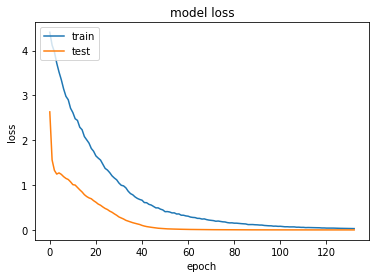

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
x = np.load('ewt_x_n4_cnn_2.npy')
y = np.load('ewt_y_n4_cnn_2.npy')

In [ ]:
model = keras.models.load_model('CNN_Model')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.85)

In [ ]:
x.shape

(2000, 14, 10, 126)

In [ ]:
history2 = model.fit(x_train,y_train, epochs=700, batch_size=16, verbose=2,validation_data = (x_test,y_test), callbacks = callbacks)

Epoch 1/700

Epoch 1: val_loss improved from inf to 1.25099, saving model to best_model_N4_r1.h5
107/107 - 2s - loss: 4.3199 - mean_absolute_error: 1.6161 - mean_squared_error: 4.3199 - val_loss: 1.2510 - val_mean_absolute_error: 0.9827 - val_mean_squared_error: 1.2510 - 2s/epoch - 23ms/step
Epoch 2/700

Epoch 2: val_loss improved from 1.25099 to 1.08419, saving model to best_model_N4_r1.h5
107/107 - 1s - loss: 3.8573 - mean_absolute_error: 1.5260 - mean_squared_error: 3.8573 - val_loss: 1.0842 - val_mean_absolute_error: 0.9133 - val_mean_squared_error: 1.0842 - 637ms/epoch - 6ms/step
Epoch 3/700

Epoch 3: val_loss improved from 1.08419 to 1.01443, saving model to best_model_N4_r1.h5
107/107 - 1s - loss: 3.4996 - mean_absolute_error: 1.4616 - mean_squared_error: 3.4996 - val_loss: 1.0144 - val_mean_absolute_error: 0.8843 - val_mean_squared_error: 1.0144 - 628ms/epoch - 6ms/step
Epoch 4/700

Epoch 4: val_loss improved from 1.01443 to 0.98194, saving model to best_model_N4_r1.h5
107/107 

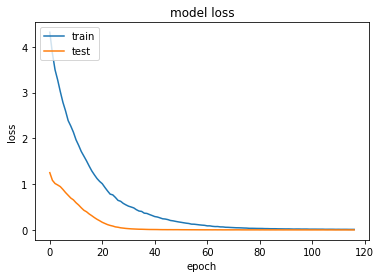

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
x = np.load('ewt_x_n4_cnn_3.npy')
y = np.load('ewt_y_n4_cnn_3.npy')

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(loss='mean_squared_error', optimizer = optimizer,metrics = ['MeanAbsoluteError','MeanSquaredError']) # Try SGD, adam, adagrad and compare!!!
file = 'best_model_N4_r3.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=10)
checkpoint = ModelCheckpoint(filepath=file, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint,es]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.85)

In [ ]:
history3 = model.fit(x_train,y_train, epochs=700, batch_size=16, verbose=2,validation_data = (x_test,y_test), callbacks = callbacks)

Epoch 1/700

Epoch 1: val_loss improved from inf to 1.18678, saving model to best_model_N4_r1.h5
160/160 - 3s - loss: 4.2422 - mean_absolute_error: 1.5784 - mean_squared_error: 4.2422 - val_loss: 1.1868 - val_mean_absolute_error: 0.9512 - val_mean_squared_error: 1.1868 - 3s/epoch - 18ms/step
Epoch 2/700

Epoch 2: val_loss improved from 1.18678 to 1.14895, saving model to best_model_N4_r1.h5
160/160 - 1s - loss: 3.4944 - mean_absolute_error: 1.4391 - mean_squared_error: 3.4944 - val_loss: 1.1489 - val_mean_absolute_error: 0.9157 - val_mean_squared_error: 1.1489 - 957ms/epoch - 6ms/step
Epoch 3/700

Epoch 3: val_loss improved from 1.14895 to 1.06650, saving model to best_model_N4_r1.h5
160/160 - 1s - loss: 3.0491 - mean_absolute_error: 1.3449 - mean_squared_error: 3.0491 - val_loss: 1.0665 - val_mean_absolute_error: 0.8628 - val_mean_squared_error: 1.0665 - 934ms/epoch - 6ms/step
Epoch 4/700

Epoch 4: val_loss improved from 1.06650 to 0.98440, saving model to best_model_N4_r1.h5
160/160 

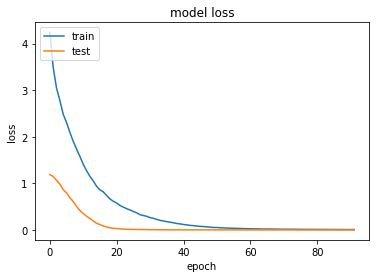

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()